In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def read_data(input_file, index):
    # Read the data from the input file
    input_data = np.loadtxt(input_file, delimiter=',')

    # Lambda function to convert strings to Pandas date format
    to_date = lambda x, y: str(int(x)) + '-' + str(int(y))

    # Extract the start date
    start = to_date(input_data[0, 0], input_data[0, 1])

    # Extract the end date
    if input_data[-1, 1] == 12:
        year = input_data[-1, 0] + 1
        month = 1
    else:
        year = input_data[-1, 0]
        month = input_data[-1, 1] + 1

    end = to_date(year, month)

    # Create a date list with a monthly frequency
    date_indices = pd.date_range(start, end, freq='M')

    # Add timestamps to the input data to create time-series data
    output = pd.Series(input_data[:, index], index=date_indices)

    return output 

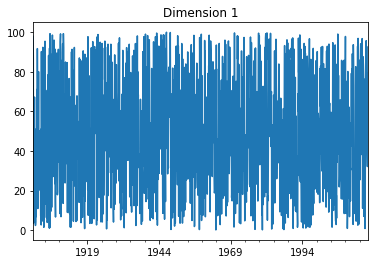

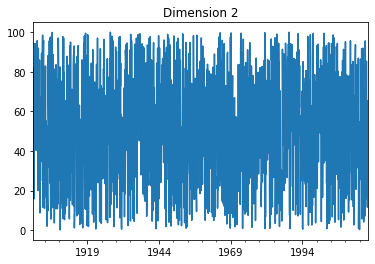

In [3]:
if __name__=='__main__':
    # Input filename
    input_file = 'data_2D.txt'

    # Specify the columns that need to be converted 
    # into time-series data
    indices = [2, 3]

    # Iterate through the columns and plot the data
    for index in indices:
        # Convert the column to timeseries format
        timeseries = read_data(input_file, index)

        # Plot the data
        plt.figure()
        timeseries.plot()
        plt.title('Dimension ' + str(index - 1))

    plt.show()